# SVM classification
SVM to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated salarly.

## Import Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

## Get the Data

In [19]:
df = pd.read_csv('Social_Network_Ads.csv')

### Check head of the dataframe

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


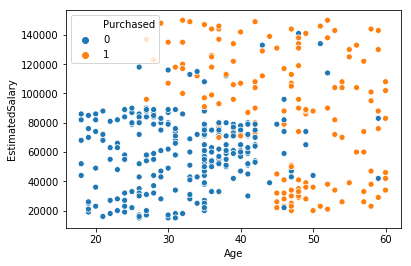

In [67]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


## Check for null values

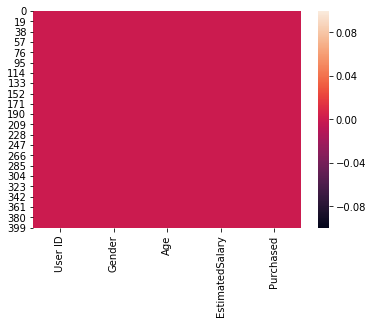

In [22]:
sns.heatmap(df.isnull())

**So in this dataset no null values are present**

## Check correlation

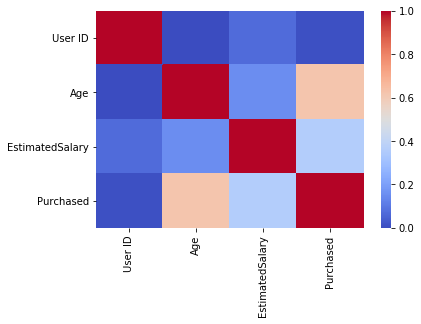

In [23]:
sns.heatmap(df.corr(),cmap='coolwarm')

**From the above heatmap,it shows UserID and target column are not correlated with each other.**

**So dropping the column UderID**

In [24]:
df.drop('User ID',inplace=True,axis=1)

In [25]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [26]:
gen = pd.get_dummies(df['Gender'],drop_first='True')

In [27]:
gen.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [28]:
df = pd.concat([df,gen],axis=1)

In [29]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [30]:
df.drop('Gender',axis=1,inplace=True)

In [31]:
df.drop('Male',axis=1,inplace=True)

In [32]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


## Standardize the Variable

Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the SVM classifier, than variables that are on a small scale.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
scaled_array =  sc.fit_transform(df.drop('Purchased',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
scaled_array

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [38]:
x = pd.DataFrame(scaled_array,columns = df.columns[:-1])

In [39]:
y = df['Purchased']

# Building a SVM model

Splitting data into a training set and test set.

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3):
djokscls
sdkldsk

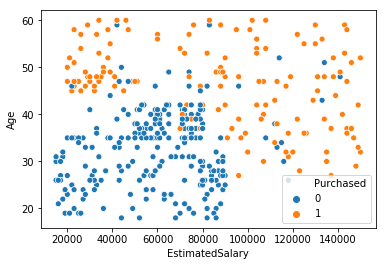

In [43]:
sns.scatterplot(x = 'EstimatedSalary',y='Age',data=df,hue='Purchased')

## Model Training and Predictions

In [44]:
from sklearn.svm import SVC

In [45]:
classifier = SVC()

In [46]:
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
ypred = classifier.predict(X_test)

In [48]:
ypred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

### Evalution of classification model.
To evaluate classification model use confusion matrix,precision,recall,f1-score.

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
cm = confusion_matrix(y_test,ypred)

In [61]:
cm

array([[62,  6],
       [ 6, 46]], dtype=int64)

In [62]:
y_test.value_counts()

0    68
1    52
Name: Purchased, dtype: int64

In [63]:
77+35+5+3

120

In [64]:
82+38

120

In [65]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        68
           1       0.88      0.88      0.88        52

   micro avg       0.90      0.90      0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120

